# Let's work with RGB Images

Here we will train a CNN to classify images from the CIFAR-10 datset.

# Load CIFAR-10 Dataset

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load the pre-shuffled train and test data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 72s 0us/step


In [7]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [13]:
X_train[1][1]   # 32 * 3

array([[140, 160, 169],
       [145, 153, 154],
       [125, 125, 118],
       [124, 129, 132],
       [150, 161, 173],
       [152, 164, 175],
       [174, 188, 200],
       [178, 189, 196],
       [134, 139, 137],
       [110, 111, 102],
       [133, 127, 120],
       [163, 156, 156],
       [192, 192, 187],
       [218, 219, 215],
       [240, 241, 238],
       [245, 246, 245],
       [241, 242, 239],
       [238, 239, 235],
       [234, 235, 229],
       [226, 227, 220],
       [142, 143, 136],
       [ 96,  97,  85],
       [ 99, 101,  84],
       [ 95,  96,  87],
       [ 89,  89,  86],
       [ 80,  81,  77],
       [ 65,  67,  60],
       [ 84,  86,  76],
       [ 92,  95,  80],
       [ 96,  99,  78],
       [ 77,  80,  62],
       [ 71,  73,  61]], dtype=uint8)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

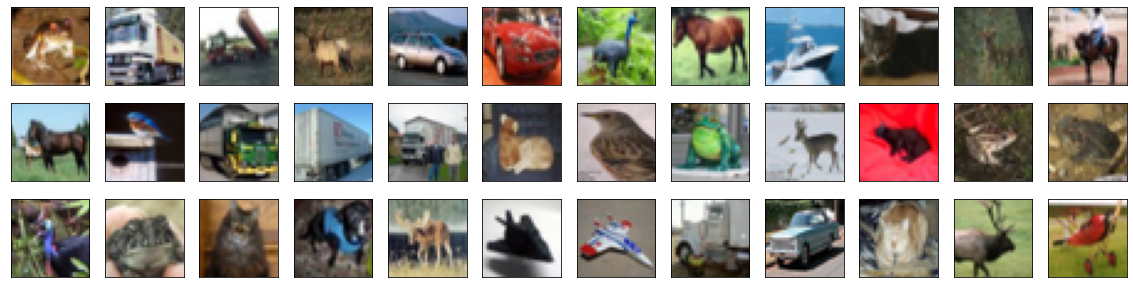

In [28]:
fig = plt.figure(figsize=(20, 5))

for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i])         # np.squeeze(X_train[0])

# Rescale the Image by Dividing Every Pixel in Excel Image by 255


In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales. Figure below shows Gradient Descent on a training set where features 1 and 2 have the same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on the right).

** Tip: ** When using Gradient Descent, you should ensure that all features have a similar scale to speed up training or else it will take much longer to converge.

In [30]:
x_train = X_train.astype('float32')/255
x_test = X_test.astype('float32')/255

# 4. Break Dataset into Training, Testing and Validation Sets

In [32]:
#from tensorflow.keras.utils import np_utils
from tensorflow import keras 

In [33]:
# One hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [34]:
# Break Training Set into Training and Validation Sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [35]:
# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [45]:
# Define the model architecture

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [49]:
model = tf.keras.Sequential()

model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))  

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
          
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
          
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
          
          
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)        

#### 16 Kernels * 3 Color Channels * 4 Parameters(2*2 Kernel) + 16 Bias = 208 Trainable Parameters
#### 32 Kernels * 16 Previous Layer Feature Maps * 4 Parameters + 32 Bias = 2080 Trainable Parameters
#### 64 kernesl * 32 Previous Layer Feature Maps * 4 Parameters + 64 Bias = 8256 Trainable Parameters
#### After Flattening - 4*4 Pixels * 64 Feature Maps = 1024 Flattened Units
#### Dense - 1024 Flattened Units * 500 Dense Units + 500 Bias = 512500 Trainable Parameters
#### Final Dense - 500 Dense Units * 10 Dense Units + 10 Bias = 5010 Trainable Parameters
#### Total Trainable Parameters = 208 + 2080 + 8256 + 512500 + 5010 = 528054

#### Without Convolution the Trainable Parameters would be same 32*32*500 + 500 =  512500

Even though CNN didn't help in reducing the number of Trainable Parameters, it's not big worry for us, as the processor would take care of it.

Here the biggest advantage of the CNN is to help us combat Spacial Invariance.
Max Pooling plays a big role here, since it chooses only most prominent from a region after filtering different patterns in Convolution Layers

In [55]:
# Compile the model

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [58]:
# Train the Model

from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, 
                 batch_size=32, 
                 epochs=1, 
                 validation_data=(x_valid, y_valid),
                callbacks=[checkpointer],
                verbose=2, shuffle=True)


Epoch 1: val_loss improved from inf to 1.39575, saving model to model.weights.best.hdf5
1407/1407 - 54s - loss: 1.5918 - accuracy: 0.4221 - val_loss: 1.3958 - val_accuracy: 0.4822 - 54s/epoch - 38ms/step


In [62]:
# Load the Model with the best vaidation accuracy

model.load_weights('model.weights.best.hdf5')

In [61]:
# Get predictions on the set
y_hat = model.predict(x_test)

# # define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

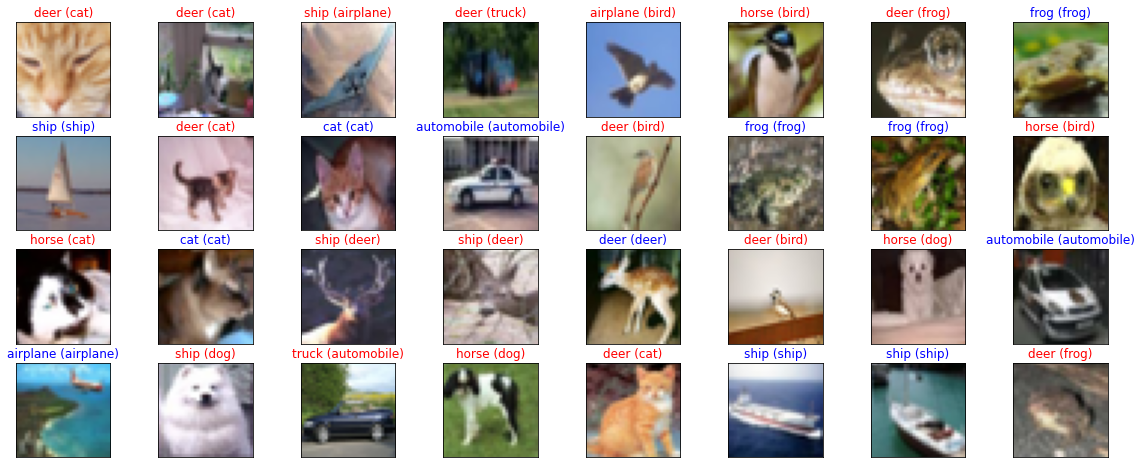

In [69]:
# Plot a Random Sample of test images, their predicted labels, and ground truth

fig = plt.figure(figsize=(20, 8))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))